# Deep Learning - CS5480 - Assignment 1A
## Perceptron Learning
## Rishit D - cs21btech11053

In [1]:
# Import Stuff
import numpy as np
import matplotlib.pyplot as plt

#### Dataset Generation
We now generate a set of 1000 points in the 2D vector space which are linearly separable into binary classes. This can be achieved by setting an internal boundary to create a separation to classify our dataset. We then assign labels based on the value of the boundary for the datapoint. We then attempt to plot our points on our vector space and verify that our dataset is indeed linearly separable.

In [2]:
# Generate an internal boundary by randomly generating parameters a, b, c for a line ax + by + c = 0
a = np.random.random()*2 - 1
b = np.random.random()*2 - 1
c = np.random.random()*2 - 1
print("a = ", a, "b = ", b, "c = ", c)

a =  0.9979303756899858 b =  -0.5752102221243178 c =  -0.5758702074118407


In [3]:
# Generate 1000 random points
X = np.random.rand(1000,2)*2 - 1

# Classify the points
y = np.sign(a*X[:,0] + b*X[:,1] + c)

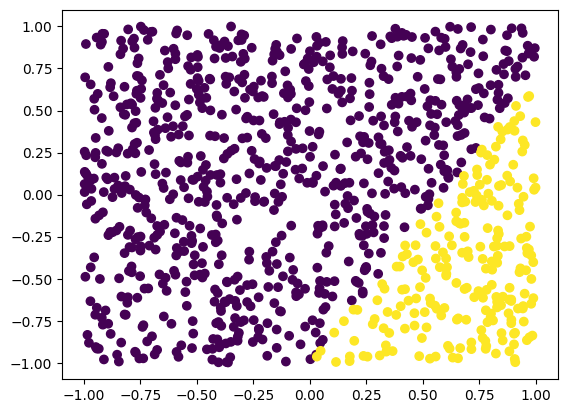

In [4]:
# Plot the points
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

#### Perceptron Learning
We firstly add a dimension to allow us to absorb the bias into the weight vector. We then initialize the weight vector $w = \mathcal{0}$ and start our iterations for our learning algorithm. 
We then look for a data-point which satisfies $y^{(i)}(\mathbf{w^T} \mathbf{x^{(i)}}) < 0$, ie, a point on the wrong side of the perceptron boundary. We update our weights as $w_{new} = w_{old} + y^{(i)}\mathbf{x^{(i)}}$ until there are no data-points which are misclassified.

In [5]:
# Augment the data
X = np.c_[np.ones(X.shape[0]), X]

# Define the perceptron algorithm
def perceptron_learner(X: np.ndarray, y: np.ndarray) -> tuple[np.ndarray, int]:
    """
        This function implements the perceptron learning algorithm
        given the data X and respective labels y assuming the given data
        is linearly separable, and returns the weights of the classifier.
    """

    # Initialize the weights
    w = np.random.rand(X.shape[1])
    k = 0

    # Iterate over the data
    while True:
        # Number of iterations
        k += 1

        # Identify the misclassified points
        missed_points = np.where(y*np.dot(X, w) <= 0)[0]
        
        # If there are no misclassified points, return the weights
        if missed_points.shape[0] == 0:
            return w, k
        
        # Pick a random misclassified point
        update_index = np.random.choice(missed_points)

        # Update the weights
        w = w + y[update_index]*X[update_index]
        
# Run and normalize the weights
w_final, k = perceptron_learner(X, y)
w_final = w_final/np.linalg.norm(w_final)
print(w_final)


[-0.45424561  0.76637273 -0.45423976]


The weights we have obtained take the form $\mathbf{w} = (w_0, w_1, w_2)$ which forms the line $w_0 + w_1x_1 + w_2x_2 = 0$.

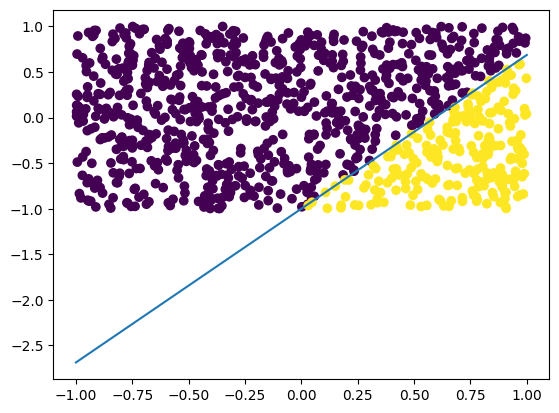

In [6]:
# Plot points and the boundary
plt.scatter(X[:,1], X[:,2], c=y)
x = np.linspace(-1, 1, 100)
plt.plot(x, -(w_final[0] + w_final[1]*x)/w_final[2])
plt.show()

#### Analysis
We first compute $\gamma$ which represents the minimum class separation described as follows:
                                                $$ \gamma = \min_{\mathbf{x^{(i)}}} y^{(i)}(\mathbf{w^T} \mathbf{x^{(i)}}) $$
We then repeat this for multiple iterations of $\mathcal{X}$ and $\mathbf{y}$ which would yield multiple $\gamma$ and $k$ where $k$ is the number of iterations for completion.

In [7]:
# Analysis for the above run
# Compute gamma
gamma = np.min(y*np.dot(X, w_final))
print("gamma = ", gamma)

# Print number of iterations
print("Number of iterations = ", k)

gamma =  0.00020352232606148901
Number of iterations =  258


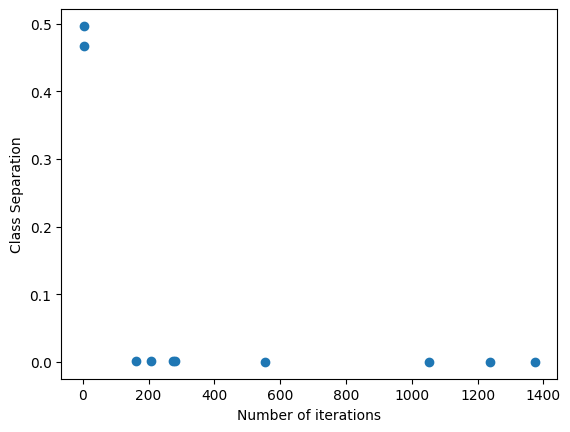

In [8]:
# Iterate over 10 random X and y
gammas = []
ks = []

for i in range(10):
    # Generate 1000 random points
    X = np.random.rand(1000,2)*2 - 1

    # Randomly generate parameters a, b, c for a line ax + by + c = 0
    a = np.random.random()*2 - 1
    b = np.random.random()*2 - 1
    c = np.random.random()*2 - 1

    # Classify the points
    y = np.sign(a*X[:,0] + b*X[:,1] + c)

    # Augment the data
    X = np.c_[np.ones(X.shape[0]), X]

    # Run for 5 iterations
    gamma_sum = 0
    k_sum = 0
    for j in range(5):
        w_final, k = perceptron_learner(X, y)
        w_final = w_final/np.linalg.norm(w_final)
        gamma_sum += np.min(y*np.dot(X, w_final))
        k_sum += k

    # Append
    gammas.append(gamma_sum/5)
    ks.append(k_sum/5)

# Plot ks vs gammas
plt.scatter(ks, gammas)
plt.xlabel("Number of iterations")
plt.ylabel("Class Separation")
plt.show()